In [3]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 121kB/s 
     |████████████████████████████████| 2.7MB 38.4MB/s 


In [0]:
import matplotlib as mpl # 기본 설정
import matplotlib.pyplot as plt # 그래프
import matplotlib.font_manager as fm # 폰트 설정

In [0]:
# 나눔 고딕 설치
!apt-get update -qq #설치 업데이트, -qq : 로그 최소한
!apt-get install fonts-nanum* -qq

In [5]:
# !ls -ltr /usr/share/fonts/truetype
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' # 설치된 나눔글꼴중 원하는 녀석의 전체
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

total 12
drwxr-xr-x 2 root root 4096 Oct 25 16:44 liberation
drwxr-xr-x 2 root root 4096 Nov  6 16:16 font-awesome
drwxr-xr-x 2 root root 4096 Nov 11 02:14 nanum


In [0]:
from gensim import corpora
from gensim import models

In [0]:
documents=[
'나는 아침에 라면을 자주 먹는다. 그리고 아침에 우유도 먹는다.',
'나는 아침에 밥 대신에 라면을 자주 먹는다. 아침에 라면을 먹으면 속이 아프다.',
'현대인의 삶에서 스마트폰은 필수품이 되었다.',
'현대인들 중에서 스마트폰을 사용하지 않는 사람은 거의 없다. ',
'점심시간에 스마트폰을 이용해 영어 회화 공부를 하느라 혼자 밥을 먹는다.'
]

In [14]:
stoplist = ('.!?')
doc1 = '나는 아침에 라면을 자주 먹는다.'
print(doc1.split())
tex_list = []
for word in doc1.split():
  # print(word)
  if word not in stoplist:
    print(word)
    tex_list.append(word)
tex_list

['나는', '아침에', '라면을', '자주', '먹는다.']
나는
아침에
라면을
자주
먹는다.


['나는', '아침에', '라면을', '자주', '먹는다.']

In [16]:
stoplist = ('.?!')

texts = [
        [word for word in document.split() if word not in stoplist]
        for document in documents
]

texts

[['나는', '아침에', '라면을', '자주', '먹는다.', '그리고', '아침에', '우유도', '먹는다.'],
 ['나는',
  '아침에',
  '밥',
  '대신에',
  '라면을',
  '자주',
  '먹는다.',
  '아침에',
  '라면을',
  '먹으면',
  '속이',
  '아프다.'],
 ['현대인의', '삶에서', '스마트폰은', '필수품이', '되었다.'],
 ['현대인들', '중에서', '스마트폰을', '사용하지', '않는', '사람은', '거의', '없다.'],
 ['점심시간에', '스마트폰을', '이용해', '영어', '회화', '공부를', '하느라', '혼자', '밥을', '먹는다.']]

## 사전과 말뭉치(코퍼스) 만들기
* 말뭉치는 문서마다 단어 ID 와 그 발생 빈도를 가지는 튜플형태

In [19]:
# 사전만들기.
## dictionary는 bag-of-words를 이용하여 생성된 단어와 그 발생횟수를 나열.
dictionary = corpora.Dictionary(texts)
dictionary

In [20]:
# 코퍼스 만들기(벡터화)
# doc2bow()는 유닉크한 결과에서 단어의 출연횟수를 계산.
# 문서마다 단어ID와 그 발생빈도를 갖는 튜플.
corpus = [dictionary.doc2bow(text) for text in texts]
print ('corpus : {}'.format(corpus))

corpus : [[(0, 1), (1, 1), (2, 1), (3, 2), (4, 2), (5, 1), (6, 1)], [(1, 1), (2, 2), (3, 1), (4, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)], [(12, 1), (13, 1), (14, 1), (15, 1), (16, 1)], [(17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)], [(3, 1), (20, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)]]


In [22]:
# 모델 구축
lda = models.ldamodel.LdaModel(corpus=corpus,
                               id2word=dictionary,
                               num_topics=2,
                               random_state=1)

for t in lda.show_topics():
  print(t)

(0, '0.052*"먹는다." + 0.044*"스마트폰을" + 0.043*"아침에" + 0.042*"회화" + 0.041*"이용해" + 0.041*"점심시간에" + 0.041*"공부를" + 0.041*"혼자" + 0.040*"밥을" + 0.040*"영어"')
(1, '0.081*"아침에" + 0.075*"먹는다." + 0.063*"라면을" + 0.048*"나는" + 0.042*"자주" + 0.036*"스마트폰을" + 0.032*"우유도" + 0.031*"사람은" + 0.031*"현대인들" + 0.031*"사용하지"')


# 두가지 주제 0, 1
* 각각의 주제마다 단어의 출현확률

In [0]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [0]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' # 설치된 나눔글꼴중 원하는 녀석의 전체

wc = WordCloud(background_color="white",
               max_words=2000,
               contour_width=3, contour_color='steeblue',
               font_path=path)

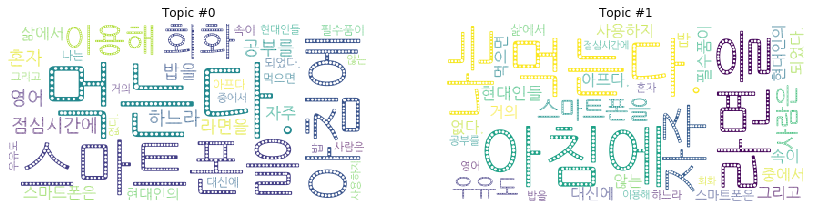

In [31]:
plt.figure(figsize=(30,30))
for t in range(lda.num_topics):
  plt.subplot(5,4,t+1)
  x = dict(lda.show_topic(t,200))
  im = wc.generate_from_frequencies(x)
  plt.imshow(im)
  plt.axis("off")
  plt.title("Topic #" + str(t))
plt.savefig('LDA_wordcloud.png', bbox_inches='tight')